#### Attribute : Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
    alfa-romero, audi, bmw, chevrolet, dodge, honda, 
    isuzu, jaguar, mazda, mercedes-benz, mercury, 
    mitsubishi, nissan, peugot, plymouth, porsche, 
    renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

In [335]:
import numpy as np
import pandas as pd
import sklearn.model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Imputer
import statsmodels.formula.api as smf
from sklearn.preprocessing import Normalizer

In [266]:
df_train = pd.read_csv('./data/data.csv')
df_train.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [228]:
df_train.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [229]:
df_train.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [326]:
#data에서 ?값이 있는 column찾기
empty_cols = {}
for col in df_train.columns:
    values = df_train[col].value_counts()
    dic_value = values.to_dict()
    for k,v in dic_value.items():
        if k == '?':
            empty_cols[col] = v
            
empty_cols

{'bore': 4,
 'horsepower': 2,
 'normalized-losses': 41,
 'num-of-doors': 2,
 'peak-rpm': 2,
 'price': 4,
 'stroke': 4}

## missing value처리

In [230]:
#missing value처리
ls = list(empty_cols)
#num-of-doors는 ?값이 있는 row삭제
ls.remove('num-of-doors')

def missingvalue(col, colType):
    nl = df_train[col].loc[df_train[col] != '?']
    mean = nl.astype(str).astype(colType).mean()
    df_train[col] = df_train[col].replace('?',mean).astype(colType)
    df_train[col].head()

for col in ls:
    colType = ''
    if df_train[col].dtype.name =='int64':
        colType = int
    else:
        colType = float
    missingvalue(col, colType)

In [232]:
#num-of-doors데이터 중 ?값은 데이터에서 제외(2개)
df_train = df_train[df_train['num-of-doors'] != '?']

In [235]:
categorical = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'engine-location',
               'drive-wheels', 'engine-type', 'num-of-cylinders', 'fuel-system']

labelencoder = LabelEncoder()
for i in categorical:
    df_train[i] = labelencoder.fit_transform(df_train[i])
df_train.head()

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Model 1

In [236]:
X = df_train.drop('price',axis =1)
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,122.0,0,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,122.0,0,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,122.0,0,1,0,1,2,2,0,94.5,...,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,1,1,0,0,3,1,0,99.8,...,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,1,1,0,0,3,0,0,99.4,...,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22


In [237]:
Y = df_train['price']

In [238]:
#트레이닝 데이터와 테스트 데이터 분리
x_train, x_test, y_train,  y_test = sklearn.model_selection.train_test_split(X, Y,train_size=0.8, test_size=0.2, random_state=0)

In [239]:
model = LinearRegression()
lm_1 = model.fit(x_train, y_train)

In [240]:
lm_1.score(x_train,y_train)

0.8852449937499757

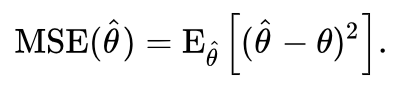

In [241]:
pred_train_y = regressor.predict(x_train)
pred_test_y = regressor.predict(x_test)

mse = np.mean((pred_test_y -y_test)**2)
mse

12918609.484316174

In [171]:
df_train1 = df_train.copy()

In [172]:
names = []
for name in df_train1.columns:
    names.append(name.replace('-', '_'))

df_train1.columns = names

In [173]:
lm0 = smf.ols(formula= 'price ~ symboling+normalized_losses+make+aspiration+num_of_doors+body_style+drive_wheels+engine_location+wheel_base+height+curb_weight+engine_type+num_of_cylinders+engine_size+fuel_system+bore+stroke+compression_ratio+peak_rpm' , data =df_train1).fit()

In [244]:
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     67.76
Date:                Wed, 16 May 2018   Prob (F-statistic):           3.07e-72
Time:                        15:00:53   Log-Likelihood:                -1897.8
No. Observations:                 203   AIC:                             3836.
Df Residuals:                     183   BIC:                             3902.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.739e+04   9989.13

## Model 2

In [247]:
#P-value 0.05이상 제거
lm1 = smf.ols(formula= 'price ~ scale(make)+scale(aspiration)+scale(body_style)+scale(engine_location)+scale(wheel_base)+scale(engine_type)+scale(num_of_cylinders)+scale(engine_size)+scale(stroke)+scale(peak_rpm)' , data =df_train1).fit()

In [248]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     117.8
Date:                Wed, 16 May 2018   Prob (F-statistic):           2.51e-76
Time:                        16:06:39   Log-Likelihood:                -1909.9
No. Observations:                 203   AIC:                             3842.
Df Residuals:                     192   BIC:                             3878.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

## Model 3

In [193]:
# 데이터 정규화 - fit_transform : 계수 추정과 자료 변환을 동시에 실행
nor = Normalizer()
df_train2 = nor.fit_transform(df_train)

In [261]:
col = []
for i in df_train.columns:
    col.append(i.replace('-', '_'))  

In [198]:
df_train2 = pd.DataFrame(df_train2 , columns  = col)
df_train2.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.000205,0.008346,0.000000,0.000068,0.0,0.000068,0.000000,0.000137,0.0,0.006061,...,0.008893,0.000342,0.000237,0.000183,0.000616,0.007593,0.342036,0.001437,0.001847,0.923156
1,0.000172,0.006999,0.000000,0.000057,0.0,0.000057,0.000000,0.000115,0.0,0.005083,...,0.007458,0.000287,0.000199,0.000154,0.000516,0.006368,0.286850,0.001205,0.001549,0.946604
2,0.000057,0.006982,0.000000,0.000057,0.0,0.000057,0.000114,0.000114,0.0,0.005408,...,0.008699,0.000286,0.000153,0.000199,0.000515,0.008813,0.286146,0.001087,0.001488,0.944280
3,0.000132,0.010804,0.000066,0.000066,0.0,0.000000,0.000198,0.000066,0.0,0.006575,...,0.007181,0.000329,0.000210,0.000224,0.000659,0.006720,0.362334,0.001581,0.001976,0.919010
4,0.000108,0.008857,0.000054,0.000054,0.0,0.000000,0.000162,0.000000,0.0,0.005368,...,0.007345,0.000270,0.000172,0.000184,0.000432,0.006211,0.297043,0.000972,0.001188,0.942438


In [202]:
Y_1 = df_train2['price']
X_1 = df_train2.drop('price',axis =1)

x_train_1, x_test_1, y_train_1,  y_test_1 = sklearn.model_selection.train_test_split(X_1, Y_1,train_size=0.8, test_size=0.2, random_state=0)

In [204]:
model = LinearRegression()
lm_2 = model.fit(x_train_1, y_train_1)

pred_train_y = model.predict(x_train_1)
pred_test_y = model.predict(x_test_1)

In [205]:
mse = np.mean((pred_test_y - y_test_1)**2)
mse

0.00024526737280098466

In [358]:
lm2 = smf.ols(formula= 'price ~ scale(aspiration)+scale(num_of_doors)+scale(wheel_base)+curb_weight+scale(engine_size)+scale(fuel_system)+scale(bore)+scale(stroke)+peak_rpm' , data =df_train2).fit()

In [359]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     809.7
Date:                Thu, 17 May 2018   Prob (F-statistic):          3.96e-148
Time:                        10:24:59   Log-Likelihood:                 595.93
No. Observations:                 203   AIC:                            -1172.
Df Residuals:                     193   BIC:                            -1139.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.0304    